# [실습6] AI 기법 성능 향상 방법론 (정답)


---

## 실습 목표
---
- 하이퍼 매개변수 튜닝에 대해 배워봅니다.
- K-fold 교차 검증을 수행해봅니다.
- Residual network를 구현해봅니다.
- Positional encoding을 구현해봅니다.
- 금속분말 데이터셋에 대한 최적의 인공지능 모델을 구현해봅니다.

## 실습 목차
---
1. **Hyper-parameter 튜닝:** 하이퍼 매개변수 튜닝을 수행해봅니다.

2. **K-fold 교차검증:** K-fold 교차검증으로 모델을 평가해봅니다.

3. **Residual network:** Residual network를 구현해봅니다.

4. **Positional encoding:** Positional encoding을 구현해봅니다.

5. **최적의 모델 구현:** 여태까지 배웠던 것들을 종합하여 최적의 인공지능 모델을 만들어봅니다.

## 실습 개요
---

이번 실습에서는 AI 모델의 성능 향상을 위한 다양한 기법을 수행해봅니다.

## 1. Hyper-parameter 튜닝
---
금속분말 데이터셋을 이용하여 하이퍼 매개변수 튜닝을 수행해보겠습니다.


### 1.1 라이브러리 불러오기

In [58]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Input
import json
import sklearn.metrics

### 1.2 데이터셋 읽어오기

In [59]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

# 삭제
# columns = json.load(open('./Data/valid_columns.json', 'r'))

### 1.3 데이터 표준화하기

### 1.3.1 Stage1 데이터 표준화하기

In [60]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [61]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [62]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

### 1.3.2 Stage2 데이터 표준화하기

In [63]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [64]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


In [65]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std

# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std

### 1.4 Hyper-parameter 범위 설정하기

랜덤 서치를 이용한 하이퍼파라미터 설정을 해봅니다. 이때 실습 시간을 고려하여, 학습데이터 중 1000개만 사용해봅니다.

In [66]:
learning_rate = [0.005, 0.03]
dropout_rate = [0.0, 0.2]
trials = 10

In [67]:
# 랜덤한 하이퍼파라미터를 리턴하는 함수
def sampling(parameter_range):
    min_value, max_value = parameter_range
    random_value = np.random.random()
    return random_value * (max_value - min_value) + min_value

In [68]:
lrs = []
drs = []
r2s = []

# 총 10회 반복
# 매 반복마다 seed 를 다르게 설정 -> 매 반복마다 random한 값들로 구성됨
for try_ in range(trials):
    np.random.seed(try_)
    
    # 0.005부터 0.03의 범위에서 랜덤한 값이 도출됨
    lr = sampling(learning_rate)
    
    # 0.0부터 0.2의 범위에서 랜덤한 값이 도출됨
    dr = sampling(dropout_rate)
    print('%d 번째 시도 - 학습률: %.3f, dropout rate: %.3f'%(try_ + 1, lr, dr))
    
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        Input(shape = stage1['train_X'].shape[1]),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(stage1['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
    )
    # 모델 학습
    history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(stage1['test_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
    print("    -> R2 score: %f"%r2)
    
    # 빈 리스트에 매 반복마다 학습률, dropout rate, r-score 추가
    # 마지막에 시각화하기 위함
    lrs.append(lr)
    drs.append(dr)
    r2s.append(r2)
    

1 번째 시도 - 학습률: 0.019, dropout rate: 0.143
    -> R2 score: 0.588637
2 번째 시도 - 학습률: 0.015, dropout rate: 0.144
    -> R2 score: 0.553708
3 번째 시도 - 학습률: 0.016, dropout rate: 0.005
    -> R2 score: 0.591842
4 번째 시도 - 학습률: 0.019, dropout rate: 0.142
    -> R2 score: 0.586992
5 번째 시도 - 학습률: 0.029, dropout rate: 0.109
    -> R2 score: 0.615365
6 번째 시도 - 학습률: 0.011, dropout rate: 0.174
    -> R2 score: 0.505968
7 번째 시도 - 학습률: 0.027, dropout rate: 0.066
    -> R2 score: 0.606369
8 번째 시도 - 학습률: 0.007, dropout rate: 0.156
    -> R2 score: 0.461730
9 번째 시도 - 학습률: 0.027, dropout rate: 0.194
    -> R2 score: 0.585974
10 번째 시도 - 학습률: 0.005, dropout rate: 0.100
    -> R2 score: 0.440979


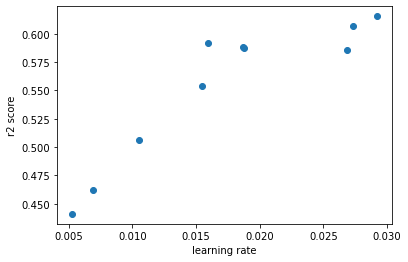

In [69]:
plt.scatter(lrs, r2s)
plt.xlabel('learning rate')
plt.ylabel('r2 score')
plt.show()

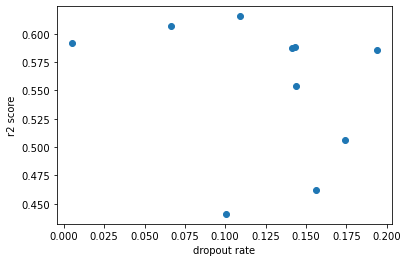

In [70]:
plt.scatter(drs, r2s)
plt.xlabel('dropout rate')
plt.ylabel('r2 score')
plt.show()

In [71]:
np.corrcoef(lrs, r2s)[1,0]

0.899412206593504

In [72]:
np.corrcoef(drs, r2s)[1,0]

-0.24580392983456553

학습률은 모델의 성능과 상관 관계가 큰 반면, dropout rate는 비교적 상관 관계가 약한 것을 확인할 수 있습니다.

**[TODO] Stage 2 데이터에 대해 hyper-parameter 튜닝을 수행해보세요.**

In [74]:
lrs = []
drs = []
r2s = []
for try_ in range(trials):
    np.random.seed(try_)
    lr = sampling(learning_rate)
    dr = sampling(dropout_rate)
    print('%d 번째 시도 - 학습률: %.3f, dropout rate: %.3f'%(try_ + 1, lr, dr))
    
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        Input(shape = stage2['train_X'].shape[1]),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dropout(rate=dr), 
        tf.keras.layers.Dense(stage2['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
    )
    # 모델 학습
    history = MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(stage2['test_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
    print("    -> R2 score: %f"%r2)
    lrs.append(lr)
    drs.append(dr)
    r2s.append(r2)

1 번째 시도 - 학습률: 0.019, dropout rate: 0.143
    -> R2 score: 0.664407
2 번째 시도 - 학습률: 0.015, dropout rate: 0.144
    -> R2 score: 0.655150
3 번째 시도 - 학습률: 0.016, dropout rate: 0.005
    -> R2 score: 0.664958
4 번째 시도 - 학습률: 0.019, dropout rate: 0.142
    -> R2 score: 0.663431
5 번째 시도 - 학습률: 0.029, dropout rate: 0.109
    -> R2 score: 0.677270
6 번째 시도 - 학습률: 0.011, dropout rate: 0.174
    -> R2 score: 0.632924
7 번째 시도 - 학습률: 0.027, dropout rate: 0.066
    -> R2 score: 0.682712
8 번째 시도 - 학습률: 0.007, dropout rate: 0.156
    -> R2 score: 0.602088
9 번째 시도 - 학습률: 0.027, dropout rate: 0.194
    -> R2 score: 0.664465
10 번째 시도 - 학습률: 0.005, dropout rate: 0.100
    -> R2 score: 0.590288


In [75]:
np.corrcoef(lrs, r2s)[1,0]

0.8974428764260832

In [76]:
np.corrcoef(drs, r2s)[1,0]

-0.21867152990530025

## 2. K-fold 교차 검증

### 2.1 데이터 합치기

In [77]:
X_stage1 = np.concatenate([stage1['train_X'], stage1['valid_X']])
y_stage1 = np.concatenate([stage1['train_y'], stage1['valid_y']])

In [ ]:
# 반복1
# training idxs
# 0 ~ 1/5까지
# 2/5 ~ 끝까지

# valid idxs
# 1/5 ~ 2/5 Rkwl

# 반복2
# training idxs
# 0 ~ 2/5까지
# 3/5 ~ 끝까지

# valid idxs
# 2/5 ~ 3/5까지

In [78]:
# k-fold 데이터셋을 도출하는 함수
# 매개변수로 독립변수, 종속변수, fold 개수를 받음
# k-1개: training, 1개: validation
def get_K_fold_dataset(X, y, K):
    dataset = {}
    len_data = len(X)
    idxs = np.arange(len_data)
    
    # k번 반복수행
    for k in range(K):
        # training: 데이터 길이의 1/5부터 2/5, 2/5부터 
        training_idxs = np.concatenate([idxs[:int(len_data * k/K)], idxs[int(len_data * (k+1)/K):]])
        valid_idxs = idxs[int(len_data * k/K) : int(len_data * (k+1)/K)]
        dataset['%d-fold'%(k+1)] = {
            'train_X': X[training_idxs],
            'valid_X': X[valid_idxs],
            'train_y': y[training_idxs],
            'valid_y': y[valid_idxs]
        }
    return dataset

데이터를 K 개의 학습-테스트 셋으로 분리하는 함수를 정의합니다.

In [79]:
# 5개의 fold
# K_fold는 dictionary 안에 dictionary 형태의 데이터셋
# 총 5개의 key: '1-fold', '2-fold', '3-fold', '4-fold', '5-fold' 가 있음.
# 각각의 key에 대한 value에는 train_X, valid_X, train_y, valid_y라는 또다른 key값이 있음
K_fold = get_K_fold_dataset(X_stage1, y_stage1, 5)

In [80]:
r2s = []
# 매 반복마다 K에는 각각
# train_X, valid_X, train_y, valid_y 이 들어감
for K in K_fold.keys():
    # 첫번째 반복이라 가정 -> 이때 K는 1-fold
    # 따라서 데이터셋은 1-fold 에 해당하는 train_X, valid_X, train_y, valid_y
    dataset = K_fold[K]
    print('%s'%K)
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        Input(shape = stage1['train_X'].shape[1]),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(stage1['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
    )
    # 모델 학습
    history = MLP_model.fit(dataset['train_X'], dataset['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(dataset['valid_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(dataset['valid_y'], pred)
    print("    -> R2 score: %f"%r2)
    r2s.append(r2)

1-fold
    -> R2 score: 0.484774
2-fold
    -> R2 score: 0.558955
3-fold
    -> R2 score: 0.488310
4-fold
    -> R2 score: 0.536155
5-fold
    -> R2 score: 0.494331


In [81]:
# K개 fold에서 나온 성능의 평균
Average_r2 = np.mean(r2s)
print("Average R2 score: %f"%Average_r2)

Average R2 score: 0.512505


모델의 최종 성능을 평가할 때에는, K개의 fold에서 나온 성능의 평균을 취합니다.

**[TODO] Stage2 데이터에 대해 K-fold 교차검증을 수행해보세요.**

In [82]:
X_stage2 = np.concatenate([stage2['train_X'], stage2['valid_X']])
y_stage2 = np.concatenate([stage2['train_y'], stage2['valid_y']])

In [83]:
K_fold = get_K_fold_dataset(X_stage2, y_stage2, 5)

In [84]:
r2s = []
for K in K_fold.keys():
    dataset = K_fold[K]
    print('%s'%K)
    # 모델 정의
    np.random.seed(0)
    random.seed(0)
    tf.random.set_seed(0)
    MLP_model = tf.keras.Sequential([
        Input(shape = stage2['train_X'].shape[1]),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(stage2['train_y'].shape[1])
    ])
    # 모델 컴파일
    MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
    )
    # 모델 학습
    history = MLP_model.fit(dataset['train_X'], dataset['train_y'], epochs = 50, batch_size = 16, verbose = 0)
    # 모델 예측
    pred = MLP_model.predict(dataset['valid_X'])
    # 모델 평가
    r2 = sklearn.metrics.r2_score(dataset['valid_y'], pred)
    print("    -> R2 score: %f"%r2)
    r2s.append(r2)

1-fold
    -> R2 score: 0.649730
2-fold
    -> R2 score: 0.625591
3-fold
    -> R2 score: 0.670080
4-fold
    -> R2 score: 0.631092
5-fold
    -> R2 score: 0.665117


In [85]:
Average_r2 = np.mean(r2s)
print("Average R2 score: %f"%Average_r2)

Average R2 score: 0.648322


## 3. Residual network

### 3.1 Residual network 정의

In [86]:
# tf.keras.Model 이라는 부모클래스에서 상속받아서 새로운 클래스 정의
# 상속을 받으면 tf.keras.Model 이 갖고 있는 모든 특성 (메소드, 멤버변수 등) 가져다가 사용할 수 있음
# 붕어빵 틀

# 클래스와 객체
# 클래스가 붕어빵 틀이라면 객체는 붕어빵
# 생성자는 슈크림 붕어빵인지 팥 붕어빵인지 초기에 세팅해주는 것

class ResidualMLP(tf.keras.Model):
    # 생성자
    # self는 객체의 주소값을 받아옴 -> 내가 빵틀에서 빵을 찍어낼건데, 너는 어떤 빵이니?
    # out_dim, use_residual을 생성자로 받아옴
    
    def __init__(self, out_dim, use_residual):
        # 부모클래스의 생성자를 그대로 가져옴 -> Model이 가지고 있는 모든 함수 이용 가능
        super(ResidualMLP, self).__init__()
        self.use_residual = use_residual
        # 총 8개의 fully connected layer
        self.fc1 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc2 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc3 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc4 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc5 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc6 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc7 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc8 = tf.keras.layers.Dense(16, activation = 'relu')
        self.fc9 = tf.keras.layers.Dense(out_dim)

    def call(self, x):
        # 객체의 use_residual이 True라면 실행
        if self.use_residual:
            h = self.fc1(x)
            h = self.fc2(h) + h
            h = self.fc3(h) + h
            h = self.fc4(h) + h
            h = self.fc5(h) + h
            h = self.fc6(h) + h
            h = self.fc7(h) + h
            h = self.fc8(h) + h
            h = self.fc9(h)
        else:
            h = self.fc1(x)
            h = self.fc2(h)
            h = self.fc3(h)
            h = self.fc4(h)
            h = self.fc5(h)
            h = self.fc6(h)
            h = self.fc7(h)
            h = self.fc8(h)
            h = self.fc9(h)
        return h

Resiudal network 같이 복잡한 네트워크를 정의하기 위해서는 Sequential 보다 위 처럼 직접 class 를 정의하는 것이 편리합니다.

In [87]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

# 객체 생성 (use_residual 은 True)
MLP_model_residual = ResidualMLP(stage1['train_y'].shape[1], use_residual = True)

### 3.2 Residual network 컴파일

In [88]:
MLP_model_residual.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

### 3.3 Residual network 학습

In [89]:
history = MLP_model_residual.fit(stage1['train_X'], stage1['train_y'], epochs = 500, batch_size = 16, verbose = 2)

Epoch 1/500
564/564 - 1s - loss: 1.1554
Epoch 2/500
564/564 - 0s - loss: 0.8017
Epoch 3/500
564/564 - 0s - loss: 0.7440
Epoch 4/500
564/564 - 0s - loss: 0.7030
Epoch 5/500
564/564 - 0s - loss: 0.6750
Epoch 6/500
564/564 - 0s - loss: 0.6579
Epoch 7/500
564/564 - 0s - loss: 0.6429
Epoch 8/500
564/564 - 0s - loss: 0.6279
Epoch 9/500
564/564 - 0s - loss: 0.6123
Epoch 10/500
564/564 - 0s - loss: 0.5989
Epoch 11/500
564/564 - 0s - loss: 0.5862
Epoch 12/500
564/564 - 0s - loss: 0.5720
Epoch 13/500
564/564 - 0s - loss: 0.5610
Epoch 14/500
564/564 - 0s - loss: 0.5466
Epoch 15/500
564/564 - 0s - loss: 0.5364
Epoch 16/500
564/564 - 0s - loss: 0.5268
Epoch 17/500
564/564 - 0s - loss: 0.5291
Epoch 18/500
564/564 - 0s - loss: 0.5158
Epoch 19/500
564/564 - 0s - loss: 0.4923
Epoch 20/500
564/564 - 0s - loss: 0.4986
Epoch 21/500
564/564 - 0s - loss: 0.5045
Epoch 22/500
564/564 - 0s - loss: 0.4801
Epoch 23/500
564/564 - 0s - loss: 0.4866
Epoch 24/500
564/564 - 0s - loss: 0.4699
Epoch 25/500
564/564 - 0s

### 3.4 Residual network 예측 및 평가

In [90]:
pred = MLP_model_residual.predict(stage1['test_X'])

In [91]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.619701


### 3.5 일반 MLP 와의 성능 비교

In [92]:
# 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

# 객체 생성 (use_residual 은 False)
MLP_model = ResidualMLP(stage1['train_y'].shape[1], use_residual = False)

use_residual 을 False로 설정하여 일반 MLP 네트워크를 정의합니다.

In [93]:
# 모델 컴파일
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

In [94]:
# 모델 학습
history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9989
Epoch 2/50
564/564 - 0s - loss: 0.9883
Epoch 3/50
564/564 - 0s - loss: 0.9532
Epoch 4/50
564/564 - 0s - loss: 0.8913
Epoch 5/50
564/564 - 0s - loss: 0.8536
Epoch 6/50
564/564 - 0s - loss: 0.8333
Epoch 7/50
564/564 - 0s - loss: 0.8171
Epoch 8/50
564/564 - 0s - loss: 0.8006
Epoch 9/50
564/564 - 0s - loss: 0.7834
Epoch 10/50
564/564 - 0s - loss: 0.7641
Epoch 11/50
564/564 - 0s - loss: 0.7450
Epoch 12/50
564/564 - 0s - loss: 0.7278
Epoch 13/50
564/564 - 0s - loss: 0.7129
Epoch 14/50
564/564 - 0s - loss: 0.6995
Epoch 15/50
564/564 - 0s - loss: 0.6880
Epoch 16/50
564/564 - 0s - loss: 0.6788
Epoch 17/50
564/564 - 0s - loss: 0.6704
Epoch 18/50
564/564 - 0s - loss: 0.6635
Epoch 19/50
564/564 - 0s - loss: 0.6564
Epoch 20/50
564/564 - 0s - loss: 0.6506
Epoch 21/50
564/564 - 0s - loss: 0.6461
Epoch 22/50
564/564 - 0s - loss: 0.6398
Epoch 23/50
564/564 - 0s - loss: 0.6366
Epoch 24/50
564/564 - 0s - loss: 0.6312
Epoch 25/50
564/564 - 0s - loss: 0.6316
Epoch 26/

In [95]:
# 모델 예측
pred = MLP_model.predict(stage1['test_X'])

In [96]:
# 모델 평가
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.431485


Residual network 가 더 성능이 좋은 것을 확인할 수 있습니다.

**[TODO] Stage2 데이터에 대해 Residual network 를 학습해보세요.**

In [101]:
# resiudal network 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_residual = ResidualMLP(stage2['train_y'].shape[1], use_residual = True)

# resiudal network 사용하지 않는 모델 정의
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model = ResidualMLP(stage2['train_y'].shape[1], use_residual = False)

In [102]:
# 모델 컴파일
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

MLP_model_residual.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

In [103]:
# residual 모델 학습
MLP_model_residual.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 1.1114
Epoch 2/50
564/564 - 0s - loss: 0.5810
Epoch 3/50
564/564 - 0s - loss: 0.5183
Epoch 4/50
564/564 - 0s - loss: 0.4848
Epoch 5/50
564/564 - 0s - loss: 0.4677
Epoch 6/50
564/564 - 0s - loss: 0.4565
Epoch 7/50
564/564 - 0s - loss: 0.4483
Epoch 8/50
564/564 - 0s - loss: 0.4411
Epoch 9/50
564/564 - 0s - loss: 0.4345
Epoch 10/50
564/564 - 0s - loss: 0.4279
Epoch 11/50
564/564 - 0s - loss: 0.4217
Epoch 12/50
564/564 - 0s - loss: 0.4165
Epoch 13/50
564/564 - 0s - loss: 0.4117
Epoch 14/50
564/564 - 0s - loss: 0.4065
Epoch 15/50
564/564 - 0s - loss: 0.4021
Epoch 16/50
564/564 - 0s - loss: 0.3972
Epoch 17/50
564/564 - 0s - loss: 0.3914
Epoch 18/50
564/564 - 0s - loss: 0.3882
Epoch 19/50
564/564 - 0s - loss: 0.3843
Epoch 20/50
564/564 - 0s - loss: 0.3805
Epoch 21/50
564/564 - 0s - loss: 0.3773
Epoch 22/50
564/564 - 0s - loss: 0.3733
Epoch 23/50
564/564 - 0s - loss: 0.3713
Epoch 24/50
564/564 - 0s - loss: 0.3679
Epoch 25/50
564/564 - 0s - loss: 0.3651
Epoch 26/

In [104]:
# 일반 MLP 모델 학습
MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9889
Epoch 2/50
564/564 - 0s - loss: 0.8115
Epoch 3/50
564/564 - 0s - loss: 0.6353
Epoch 4/50
564/564 - 0s - loss: 0.6166
Epoch 5/50
564/564 - 0s - loss: 0.5992
Epoch 6/50
564/564 - 0s - loss: 0.5779
Epoch 7/50
564/564 - 0s - loss: 0.5559
Epoch 8/50
564/564 - 0s - loss: 0.5352
Epoch 9/50
564/564 - 0s - loss: 0.5168
Epoch 10/50
564/564 - 0s - loss: 0.5020
Epoch 11/50
564/564 - 0s - loss: 0.4891
Epoch 12/50
564/564 - 0s - loss: 0.4796
Epoch 13/50
564/564 - 0s - loss: 0.4726
Epoch 14/50
564/564 - 0s - loss: 0.4643
Epoch 15/50
564/564 - 0s - loss: 0.4577
Epoch 16/50
564/564 - 0s - loss: 0.4473
Epoch 17/50
564/564 - 0s - loss: 0.4345
Epoch 18/50
564/564 - 0s - loss: 0.4247
Epoch 19/50
564/564 - 0s - loss: 0.4192
Epoch 20/50
564/564 - 0s - loss: 0.4142
Epoch 21/50
564/564 - 0s - loss: 0.4106
Epoch 22/50
564/564 - 0s - loss: 0.4067
Epoch 23/50
564/564 - 0s - loss: 0.4038
Epoch 24/50
564/564 - 0s - loss: 0.4004
Epoch 25/50
564/564 - 0s - loss: 0.3950
Epoch 26/

In [105]:
# Residual 모델 예측
pred = MLP_model_residual.predict(stage2['test_X'])

In [106]:
# Residual 모델 평가
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.660385


In [107]:
# 일반 MLP 모델 예측
pred = MLP_model.predict(stage2['test_X'])

In [108]:
# 일반 MLP 모델 평가
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.640176


## 4. Positional encoding

In [109]:
# L은 위치 인코딩에서 사용되는 주파수(frequency)의 개수를 의미.
# frequency는 주파수를 의미
# 위치 인코딩은 사인(sin)과 코사인(cos) 함수를 사용하여 위치 정보를 인코딩
# 이 때 주파수가 높을수록 더 빠른 주기로 변화
# 주파수는 주기를 반복하는 빈도를 나타내는데, 예를 들어 주파수가 높을수록 더 자주 반복되는 주기가 발생
# 따라서 L 값이 클수록 주파수가 높아지며, 더 많은 주기가 포함된 위치 인코딩 값을 생성
# 이로 인해 더 많은 세부적인 위치 정보가 인코딩되어 모델이 입력 시퀀스의 순서를 더 세밀하게 학습

# X: 입력 시퀀스의 위치 정보를 나타내는 배열. 크기는 (N, d)이며, N은 시퀀스의 길이이고, d는 입력 벡터의 차원
# L: 위치 인코딩의 차원을 결정하는 파라미터로, 정수
def positional_encoding(X, L):
    Xs = []
    # l이 증가할수록 사인과 코사인 함수의 주기가 더 빠르게 변하므로, 더 높은 주파수 정보를 포함합니다.
    for l in range(L):
        # sin, cos의 인자값은 radian이기 때문에 pi를 곱해줌
        Xs.append(np.sin(2 ** l * np.pi * X))
        Xs.append(np.cos(2 ** l * np.pi * X))        
    return np.concatenate(Xs, axis = -1)

입력 데이터를 L개의 frequency를 가진 데이터로 변환하는 함수를 정의합니다.

In [110]:
train_X = positional_encoding(stage1['train_X'], 5)
test_X = positional_encoding(stage1['test_X'], 5)

In [111]:
train_X.shape

(9016, 370)

In [112]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_pe = ResidualMLP(stage1['train_y'].shape[1], use_residual = True)

In [113]:
MLP_model_pe.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

In [114]:
history = MLP_model_pe.fit(train_X, stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9860
Epoch 2/50
564/564 - 0s - loss: 0.7869
Epoch 3/50
564/564 - 0s - loss: 0.7251
Epoch 4/50
564/564 - 0s - loss: 0.6654
Epoch 5/50
564/564 - 0s - loss: 0.6307
Epoch 6/50
564/564 - 0s - loss: 0.6077
Epoch 7/50
564/564 - 0s - loss: 0.5850
Epoch 8/50
564/564 - 0s - loss: 0.5548
Epoch 9/50
564/564 - 0s - loss: 0.5220
Epoch 10/50
564/564 - 0s - loss: 0.4918
Epoch 11/50
564/564 - 0s - loss: 0.4750
Epoch 12/50
564/564 - 0s - loss: 0.4494
Epoch 13/50
564/564 - 0s - loss: 0.4307
Epoch 14/50
564/564 - 0s - loss: 0.4168
Epoch 15/50
564/564 - 0s - loss: 0.4058
Epoch 16/50
564/564 - 0s - loss: 0.3917
Epoch 17/50
564/564 - 0s - loss: 0.3935
Epoch 18/50
564/564 - 0s - loss: 0.3991
Epoch 19/50
564/564 - 0s - loss: 0.3858
Epoch 20/50
564/564 - 0s - loss: 0.3765
Epoch 21/50
564/564 - 0s - loss: 0.3693
Epoch 22/50
564/564 - 0s - loss: 0.3981
Epoch 23/50
564/564 - 0s - loss: 0.3894
Epoch 24/50
564/564 - 0s - loss: 0.3727
Epoch 25/50
564/564 - 0s - loss: 0.3730
Epoch 26/

In [115]:
pred = MLP_model_pe.predict(test_X)

In [116]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.588890


금속분말 데이터셋에 대해서 positional encoding은 좋은 효과가 없었습니다. 모든 머신러닝 방법론이 항상 좋은 성능을 보장하진 않습니다. 

**[TODO] Stage2 데이터에 대해 positional encoding 적용해보기**

In [117]:
train_X = positional_encoding(stage2['train_X'], 5)
test_X = positional_encoding(stage2['test_X'], 5)

In [118]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
MLP_model_pe = ResidualMLP(stage2['train_y'].shape[1], use_residual = True)

In [119]:
MLP_model_pe.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

In [120]:
history = MLP_model_pe.fit(train_X, stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.8095
Epoch 2/50
564/564 - 0s - loss: 0.5806
Epoch 3/50
564/564 - 0s - loss: 0.5197
Epoch 4/50
564/564 - 0s - loss: 0.4760
Epoch 5/50
564/564 - 0s - loss: 0.4564
Epoch 6/50
564/564 - 0s - loss: 0.4457
Epoch 7/50
564/564 - 0s - loss: 0.4380
Epoch 8/50
564/564 - 0s - loss: 0.4315
Epoch 9/50
564/564 - 0s - loss: 0.4273
Epoch 10/50
564/564 - 0s - loss: 0.4226
Epoch 11/50
564/564 - 0s - loss: 0.4099
Epoch 12/50
564/564 - 0s - loss: 0.3824
Epoch 13/50
564/564 - 0s - loss: 0.3616
Epoch 14/50
564/564 - 0s - loss: 0.3534
Epoch 15/50
564/564 - 0s - loss: 0.3477
Epoch 16/50
564/564 - 0s - loss: 0.3446
Epoch 17/50
564/564 - 0s - loss: 0.3416
Epoch 18/50
564/564 - 0s - loss: 0.3386
Epoch 19/50
564/564 - 0s - loss: 0.3359
Epoch 20/50
564/564 - 0s - loss: 0.3334
Epoch 21/50
564/564 - 0s - loss: 0.3287
Epoch 22/50
564/564 - 0s - loss: 0.3265
Epoch 23/50
564/564 - 0s - loss: 0.3232
Epoch 24/50
564/564 - 0s - loss: 0.3217
Epoch 25/50
564/564 - 0s - loss: 0.3192
Epoch 26/

In [121]:
pred = MLP_model_pe.predict(test_X)

In [122]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.674008


## 5. [TODO] 최적의 인공지능 모델 구현

여태까지 배운 내용들을 종합하여 금속분말 데이터셋에 대해 최고 성능을 발휘하는 최적의 인공지능 모델을 만들어보세요.

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>